# PINT Example Session

The PINT homepage is at:  https://github.com/nanograv/PINT.
There, you can find a Wiki with information on installing PINT
PINT can be run via a script, in an interactive session with ipython or jupyter, or using one of the command-line tools provided.

## Times of Arrival (TOAs)

The raw data for PINT are TOAs, which can be read in from files in a variety of formats, or constructed programatically. PINT currently can read TEMPO, Tempo2, and Fermi "FT1" photon files.

Note:  The first time TOAs get read in, lots of processing (can) happen, which can take some time. However, a  "pickle" file is saved, so the next time the same file is loaded (if nothing has changed), the TOAs will be loaded from the pickle file, which is much faster.

In [1]:
from __future__ import print_function, division
import numpy as np
import astropy.units as u

In [2]:
# Here is how to create a single TOA in Python
import pint.toa as toa
a = toa.TOA((54567, 0.876876876876876), 4.5, freq=1400.0, obs="GBT", backend="GUPPI",location=None)
print(a)

54567.876876876876875:  4.500 us error from 'gbt' at 1400.0000 MHz {'backend': 'GUPPI', 'location': None}


In [3]:
# An example of reading a TOA file
import pint.toa as toa
t = toa.get_TOAs("NGC6440E.tim",usepickle=False)

INFO: No pulse numbers found in NGC6440E.tim [pint.toa]
INFO: Applying clock corrections (include_GPS = True, include_BIPM = True. [pint.toa]
INFO: Observatory gbt, loading clock file /home/archibald/projects/pint/PINT/pint/datafiles/time.dat [pint.observatory.topo_obs]
INFO: Loading tempo observatory (1) clock correction file /home/archibald/projects/pint/PINT/pint/datafiles/time.dat [pint.observatory.clock_file]
INFO: Evaluating observatory clock corrections. [pint.observatory.topo_obs]
INFO: Applying GPS to UTC clock correction (~few nanoseconds) [pint.observatory.topo_obs]
INFO: Observatory gbt, loading GPS clock file /home/archibald/projects/pint/PINT/pint/datafiles/gps2utc.clk [pint.observatory.topo_obs]
INFO: Loading tempo2 observatory clock correction file /home/archibald/projects/pint/PINT/pint/datafiles/gps2utc.clk [pint.observatory.clock_file]
INFO: Applying TT(TAI) to TT(BIPM) clock correction (~27 us) [pint.observatory.topo_obs]
INFO: Observatory gbt, loading BIPM clock fi

INFO: Ephemeris 'de421' not found: 'unknown url type: 'de421'' trying to download from non-astropy locations [pint.solar_system_ephemerides]


In [4]:
#  Here is a summary.
t.print_summary()

Number of TOAs:  62
Number of commands:  1
Number of observatories:  1 ['gbt']
MJD span:  53478.286 to 54187.587
gbt TOAs (62):
  Min error:     13.2 us
  Max error:     118 us
  Mean error:    26.9 us
  Median error:  22.1 us
  Error stddev:  15.6 us



In [5]:
# Here is the MJD of the first TOA
t.get_mjds()[0]

<Quantity 53478.28587142 d>

TOAs are stored in a [Astropy Table](http://astropy.readthedocs.org/en/latest/table/)  in an instance of the TOAs class. 

In [6]:
# List the table columns, which include pre-computed TDB times and solar system positions and velocities
t.table.colnames

['index',
 'mjd',
 'mjd_float',
 'error',
 'freq',
 'obs',
 'flags',
 'tdb',
 'tdbld',
 'ssb_obs_pos',
 'ssb_obs_vel',
 'obs_sun_pos']

Lots of cool things that tables can do...

In [7]:
# This pops open a browser window showing the contents of the table 
tt = t.table
#tt.show_in_browser()

Can do fancy sorting, selecting, re-arranging very easily.

In [8]:
select = t.get_errors() < 20*u.us
print(select)

[False False False False False False False  True False False False False
 False False  True False  True False False False  True False  True False
  True  True  True  True False  True False  True  True  True False False
 False False False False False False  True  True False  True  True False
 False False  True False False False False False False False False False
 False False]


In [9]:
tt['tdb'][select]

53679.87638798794
53690.85126495607
53695.85965074819
53709.81035518692
53740.775353131845
53801.59218746964
53833.2985647664
53833.50321218054
53843.33283383857
53865.37670583518
53895.32422385059


Many PINT routines / classes / functions use [Astropy Units](http://astropy.readthedocs.org/en/latest/units/) internally or externally:

In [10]:
t.get_errors() 

<Quantity [ 21.71,  21.95,  29.95,  25.46,  23.43,  31.67,  30.26,  13.52,
            21.64,  27.41,  24.58,  23.52,  21.71,  21.47,  17.72,  28.88,
            14.63,  38.03,  31.47,  33.26,  13.88,  26.89,  18.29,  21.48,
            17.88,  18.59,  19.03,  15.07,  21.58,  14.72,  25.14,  14.65,
            19.29,  13.25,  20.71,  23.57,  23.45,  22.16,  23.53,  21.01,
            21.66,  75.3 ,  19.65,  16.28,  21.93,  14.  ,  19.35,  32.92,
            33.83, 118.43,  16.45,  30.18,  21.8 ,  20.75,  32.75,  31.29,
            37.13,  37.4 ,  35.24,  50.83,  38.43,  48.59] us>

The times in each row contain (or are derived from) [Astropy Time](http://astropy.readthedocs.org/en/latest/time/) objects:

In [11]:
t0 = tt['mjd'][0]

In [12]:
t0.tai

<Time object: scale='tai' format='pulsar_mjd' value=53478.28624178991>

But the most useful timescale, TDB is also stored as long double numpy arrays, to maintain precision:

In [13]:
tt['tdbld'][:3]

53478.286614308378386
53483.277448077169016
53489.469132675783513


## Timing (or other) Models

Now let's define and load a timing model

In [14]:
import pint.models as models
m = models.get_model("NGC6440E.par")

In [15]:
print(m.as_parfile())

PSR                            1748-2021E
EPHEM                               DE421
UNITS                                 TDB
RAJ                     17:48:52.75000000 1 0.00000010000000000000
DECJ                   -20:21:29.00000000 1 0.00001000000000000000
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH            53750.000000000000000
F0                           61.485476554 1 1e-11
F1                             -1.181e-15 1 1e-19
PEPOCH              53750.000000000000000
PLANET_SHAPIRO                          N
DM                                  223.9 1 0.03
DM1                                   0.0
NE_SW                                 0.0
SWM                                   0.0
TZRMJD              53801.386051182230000
TZRSITE                                 1
TZRFRQ                           1949.609



Timing models are basically composed of "delay" terms and "phase" terms. Currently the delay terms are organized into two 'levels'. L1 are delay terms local to the Solar System, which are needed for computing 'barycenter-corrected' TOAs. L2 are delay terms for the binary system.  (This system may change in the future to accommodate more complicated scenarios)

In [16]:
m.delay_funcs

[<bound method Astrometry.solar_system_geometric_delay of <pint.models.astrometry.AstrometryEquatorial object at 0x7f3620c9d128>>,
 <bound method SolarSystemShapiro.solar_system_shapiro_delay of <pint.models.solar_system_shapiro.SolarSystemShapiro object at 0x7f3620cc58d0>>,
 <bound method DispersionDM.constant_dispersion_delay of <pint.models.dispersion_model.DispersionDM object at 0x7f3620cbb470>>,
 <bound method SolarWindDispersion.solar_wind_delay of <pint.models.solar_wind_dispersion.SolarWindDispersion object at 0x7f3620cbba20>>]

In [17]:
m.phase_funcs

[<bound method Spindown.spindown_phase of <pint.models.spindown.Spindown object at 0x7f3620cbbc18>>]

Can easily show/compute individual terms...

In [18]:
ds = m.solar_system_shapiro_delay(t)
print(ds)

[-4.11774615e-06 -4.58215733e-06 -5.09435414e-06  1.26025166e-05
  1.26025164e-05  1.26025162e-05  1.26025160e-05  1.26025163e-05
  1.34033282e-05  1.35163226e-05  1.43416919e-05  1.53159181e-05
  1.63198995e-05  1.64587639e-05  1.80783671e-05  2.11530227e-05
  2.12647452e-05  2.49851393e-05  2.51080759e-05  3.45107578e-05
  3.47450145e-05  3.00319035e-05  2.98083009e-05  2.11804876e-06
  2.07541049e-06 -3.00762925e-06 -3.03173087e-06 -4.09655364e-06
 -5.80849733e-06 -5.81983363e-06 -6.90339229e-06 -6.90646307e-06
 -6.82672804e-06 -6.82292820e-06 -5.19141699e-06 -5.17650522e-06
 -2.63564143e-06 -2.60880558e-06  2.28385789e-06  2.32788086e-06
  1.51692739e-05  1.52882687e-05  5.13321681e-05  4.61456319e-05
  3.99876478e-05  3.82020218e-05  6.59654821e-06  6.09155453e-06
  5.78124973e-06  5.45386907e-06  5.22873336e-06  3.47897242e-06
 -1.52400083e-06 -1.56079046e-06  3.82020202e-05  3.82020207e-05
  3.82020212e-05  3.82020216e-05  3.82020219e-05  3.82020222e-05
  3.82020225e-05  3.82020

Text(0, 0.5, 'Delay ($\\mu$s)')

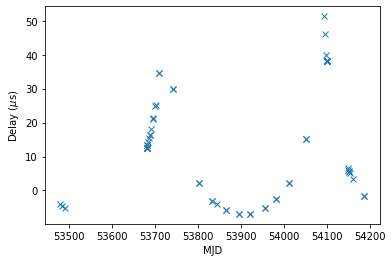

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t.get_mjds(high_precision=False), ds*1e6, 'x')
plt.xlabel("MJD") ; plt.ylabel("Delay ($\mu$s)")

or all of the terms added together:

In [20]:
m.delay(t)

<Quantity [-256.27780385, -292.17727414, -333.75096918,  357.15222974,
            357.10424491,  357.06652485,  357.03633769,  357.08429712,
            367.69388946,  369.13838938,  379.080215  ,  389.80455011,
            399.7984286 ,  401.11641315,  415.02787367,  435.89826732,
            436.54658382,  454.24106089,  454.72545487,  478.04207904,
            478.38385956,  468.46407861,  467.91561351,   94.36851725,
             92.62907224, -175.81784133, -177.46527042, -253.52910299,
           -394.21626285, -395.23691322, -497.24000468, -497.54026381,
           -488.57105536, -488.1777565 , -337.19429477, -335.91546229,
           -146.57383909, -144.8059907 ,  105.78805673,  107.5422893 ,
            389.24590076,  390.51827027,  490.40921287,  488.47335247,
            484.41365305,  482.68741688,  240.08987512,  226.85717062,
            218.50192024,  209.24145601,  202.56740375,  146.32214659,
            -81.97888773,  -84.14610449,  482.769396  ,  482.74220183,
      

In [21]:
m.phase(t)

Phase(int=<Quantity [-1.44341954e+09, -1.41690430e+09, -1.38400938e+09,
           -3.72542787e+08, -3.72542787e+08, -3.72542787e+08,
           -3.72542787e+08, -3.72542787e+08, -3.62847847e+08,
           -3.61499695e+08, -3.52032417e+08, -3.41404820e+08,
           -3.31051996e+08, -3.29649995e+08, -3.14244015e+08,
           -2.88506714e+08, -2.87639064e+08, -2.61817243e+08,
           -2.61038143e+08, -2.14444888e+08, -2.13530679e+08,
           -5.01336260e+07, -4.90332780e+07,  2.72978647e+08,
            2.74069813e+08,  4.42521539e+08,  4.43608798e+08,
            4.95831818e+08,  6.11929492e+08,  6.12945188e+08,
            7.70924046e+08,  7.72043031e+08,  9.03412910e+08,
            9.04406151e+08,  1.08890761e+09,  1.08998276e+09,
            1.22664968e+09,  1.22780114e+09,  1.38557098e+09,
            1.38668825e+09,  1.59742747e+09,  1.59871034e+09,
            1.82559636e+09,  1.83620365e+09,  1.85220237e+09,
            1.85775342e+09,  2.11794965e+09,  2.12718658e+09

## Residuals

In [22]:
import pint.residuals as r

In [23]:
rs = r.Residuals(t, m).phase_resids

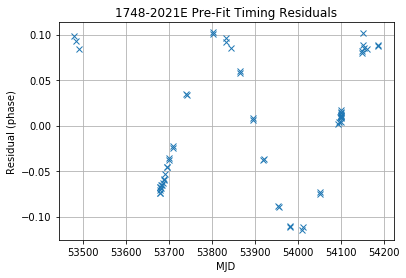

In [24]:
# The get_mjds() function returns float MJDs for easy plotting, rather than astropy Time objects
plt.plot(t.get_mjds(), rs, 'x')
plt.title("%s Pre-Fit Timing Residuals" % m.PSR.value)
plt.xlabel('MJD'); plt.ylabel('Residual (phase)')
plt.grid()


## Fitting and Post-Fit residuals

The fitter is *completely* separate from the model and the TOA code.  So you can use any type of fitter with some easy coding.  This example uses a very simple Powell minimizer from the SciPy optimize module. 

In [25]:
import pint.fitter as fit
f = fit.WlsFitter(t, m)
f.fit_toas()

<Quantity 59.57431442>

In [26]:
print("Best fit has reduced chi^2 of", f.resids.chi2_reduced)
print("RMS in phase is", f.resids.phase_resids.std())
print("RMS in time is", f.resids.time_resids.std().to(u.us))
print("\n Best model is:")
print(f.model.as_parfile())


Best fit has reduced chi^2 of 1.0451634108606467
RMS in phase is 0.0020495744842927155 cycle
RMS in time is 33.33428639005908 us

 Best model is:
PSR                            1748-2021E
EPHEM                               DE421
UNITS                                 TDB
RAJ                     17:48:52.80034692 1 0.00000003756850254201
DECJ                   -20:21:29.38330657 1 0.00000912542586891742
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH            53750.000000000000000
F0                  61.485476554372500042 1 1.8086084392781573376e-11
F1              -1.1813316313839114882e-15 1 1.4418540386148105756e-18
PEPOCH              53750.000000000000000
PLANET_SHAPIRO                          N
DM                  224.11379737855920936 1 0.03493898049413107082
DM1                                   0.0
NE_SW                                 0.0
SWM                                   0.0
TZRMJD  

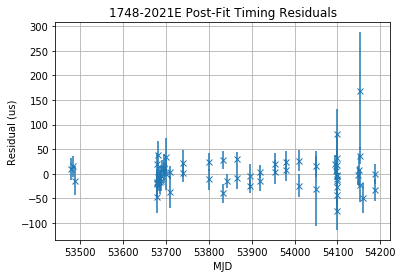

In [27]:
plt.errorbar(t.get_mjds().value,
             f.resids.time_resids.to(u.us).value,
             t.get_errors().to(u.us).value, fmt='x')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel('MJD'); plt.ylabel('Residual (us)')
plt.grid()

## Other interesting things

We can make Barycentered TOAs in a single line!

In [28]:
m.get_barycentric_toas(t)

<Quantity [53478.28958049, 53483.28082976, 53489.47299553, 53679.87225507,
           53679.87225507, 53679.87225507, 53679.87225507, 53679.87225507,
           53681.69723814, 53681.95101532, 53683.73314312, 53685.73369027,
           53687.68251394, 53687.9464277 , 53690.84646139, 53695.69127101,
           53695.85459813, 53700.71531786, 53700.86197625, 53709.63272692,
           53709.80481834, 53740.56280708, 53740.76993744, 53801.38571343,
           53801.59111537, 53833.3005997 , 53833.50526618, 53843.3357682 ,
           53865.19008493, 53865.38128034, 53895.11934381, 53895.32998242,
           53920.05915093, 53920.24611939, 53954.97681797, 53955.1792041 ,
           53980.90549269, 53981.12224385, 54010.82096314, 54011.0312776 ,
           54050.70099242, 54050.94248163, 54093.65168364, 54095.64840818,
           54098.6600184 , 54099.70495257, 54148.68449507, 54150.42326217,
           54151.5250477 , 54152.71578   , 54153.54699406, 54160.5219243 ,
           54187.33328679